In [33]:
class Location(object):
    def __init__(self, x, y):
        """x and y are floats"""
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        """deltaX and deltaY are floats"""
        return Location(self.x + deltaX,
                        self.y + deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self, other):
        xDist = self.x - other.getX()
        yDist = self.y - other.getY()
        return (xDist**2 + yDist**2)**0.5
    
    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

In [34]:
# base class, it's only purpose is to be inherited    
class Drunk(object):
    def __init__(self, name = None):
        """assumes name is a str"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return "anon"

In [35]:
import random

class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        return random.choice(stepChoices)

class MasochistDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0, 1.1), (0.0, -0.9), (1.0, 0.0), (-1.0, 0.0)] # biased random walk
        return random.choice(stepChoices)

In [36]:
class Field(object):
    def __init__(self):
        self.drunks = {}

    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc

    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        self.drunks[drunk] = self.drunks[drunk].move(xDist, yDist)


In [37]:
def walk(f, d, numSteps):
    """assumes f a Field, d a D a Drunk in f, and numSteps as int >= 0.
    Moves d numSteps times; returns the distance between the final location and the location at the start of the walk.
    """
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

In [38]:
def simWalks(numSteps, numTrials, dClass):
    """assumes numSteps an int >= 0, numTrials an int > 0, dClass a subclass of Drunk.
    Simulates numTrial walks of numSteps steps each. Returns a list of final distances for each trial.
    """
    Homer = dClass()
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numSteps), 1)) 
    return distances

In [70]:
def drunkTest(walkLengths, numTrials, dClass):
    """assumes walkLengths a sequence of ints >= 0
    numTrials an int > 0,
    dClass a subclass of Drunk
    for each number of steps in WalkLengths, runs simWalks with numTrials walks and prints results
    """
    means = []
    for numSteps in walkLengths:
      distances = simWalks(numSteps, numTrials, dClass)
      print(dClass.__name__, 'random walk of', numSteps, 'steps.')
      mean = round(sum(distances) / len(distances), 4)
      means.append(mean)
      print('Mean =', mean)
      print('Max:', max(distances),
            'Min:', min(distances))
    return means

In [71]:
random.seed(0)
# sanity check
drunkTest((0, 1, 2), 1000, UsualDrunk) 

UsualDrunk random walk of 0 steps.
Mean = 0.0
Max: 0.0 Min: 0.0
UsualDrunk random walk of 1 steps.
Mean = 1.0
Max: 1.0 Min: 1.0
UsualDrunk random walk of 2 steps.
Mean = 1.1976
Max: 2.0 Min: 0.0


[0.0, 1.0, 1.1976]

In [62]:
walkLengths = (10, 100, 1000, 10000)
numTrials = 1000

In [63]:
xVals = walkLengths

In [64]:
yVals1 = drunkTest(walkLengths, numTrials, UsualDrunk)

UsualDrunk random walk of 10 steps.
Mean = 2.7888
Max: 7.1 Min: 0.0
UsualDrunk random walk of 100 steps.
Mean = 9.0423
Max: 30.5 Min: 0.0
UsualDrunk random walk of 1000 steps.
Mean = 28.46
Max: 86.2 Min: 1.4
UsualDrunk random walk of 10000 steps.
Mean = 89.9817
Max: 257.4 Min: 4.0


In [65]:
yVals2 = drunkTest(walkLengths, numTrials, MasochistDrunk)

MasochistDrunk random walk of 10 steps.
Mean = 2.89
Max: 8.3 Min: 0.2
MasochistDrunk random walk of 100 steps.
Mean = 9.9853
Max: 28.1 Min: 0.0
MasochistDrunk random walk of 1000 steps.
Mean = 55.7988
Max: 117.1 Min: 1.5
MasochistDrunk random walk of 10000 steps.
Mean = 503.4045
Max: 726.5 Min: 171.1


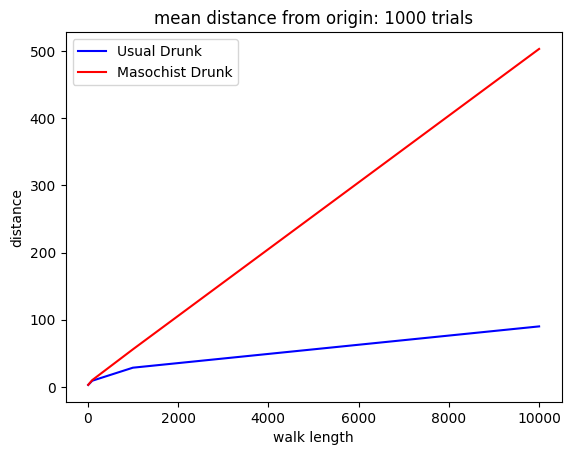

In [78]:
import pylab

pylab.xlabel('walk length')
pylab.ylabel('distance')
pylab.title('mean distance from origin: 1000 trials')

pylab.plot(xVals, yVals1, '-b', label='Usual Drunk')
pylab.plot(xVals, yVals2, '-r', label='Masochist Drunk')

pylab.legend()